In [ ]:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)


# RDFLib

En este cuaderno:

1. Se utiliza [rdflib](https://rdflib.readthedocs.io/en/stable/index.html) para generar un grafo [RDF](https://www.w3.org/TR/rdf11-primer/) a partir de datos
2. Se consulta y administra el grafo utilizando el lenguaje estándar [SPARQL](https://www.w3.org/TR/sparql11-overview/)
3. Se consulta y administra el grafo a más bajo nivel, mediante métodos propios de rdflib
4. Se exporta el grafo para ser procesado por programas más generales de análisis de grafos, como [networkx](https://networkx.org)


## Generación de un grafo RDF

### Datos
**Datos iniciales**. Como datos de entrada, lo usual es partir de un fichero o de una consulta que devuelve un dataset. Para este ejemplo sencillo se parte de una pequeña lista de diccionarios.

In [1]:
pers = [ 
    {'nombre':'Marcos', 'año_nacimiento':'1962', 'lugar_nacimiento':'Salamanca', 'tiene_madre':'Belén', 'tiene_padre':'Ángel'},
    {'nombre':'Arturo', 'año_nacimiento':'1966', 'lugar_nacimiento':'Salamanca', 'tiene_madre':'Belén', 'tiene_padre':'Ángel'},
    {'nombre':'Pedro', 'año_nacimiento':'1979', 'lugar_nacimiento':'Badajoz', 'tiene_madre':'Inés', 'tiene_padre':'Pablo'},
    {'nombre':'Luis', 'año_nacimiento':'1984', 'lugar_nacimiento':'Madrid', 'tiene_madre':'Isabel', 'tiene_padre':'Jorge'},
    {'nombre':'Ana', 'año_nacimiento':'1982', 'lugar_nacimiento':'Madrid', 'tiene_madre':'Isabel', 'tiene_padre':'Jorge'},
    {'nombre':'Sonia', 'año_nacimiento':'1980', 'lugar_nacimiento':'Valencia', 'tiene_madre':'María', 'tiene_padre':'Fernando'},
    {'nombre':'Begoña', 'año_nacimiento':'2010', 'lugar_nacimiento':'Madrid', 'tiene_madre':'Sonia', 'tiene_padre':'Pedro'},
    {'nombre':'Marta', 'año_nacimiento':'2015', 'lugar_nacimiento':'Soria', 'tiene_madre':'Ana', 'tiene_padre':'Arturo'},
    {'nombre':'Juan', 'año_nacimiento':'2020', 'lugar_nacimiento':'Teruel', 'tiene_madre':'Ana', 'tiene_padre':'Pedro'} ]

print(f"{pers[0]['nombre']} nació en {pers[0]['año_nacimiento']} en {pers[0]['lugar_nacimiento']}")

Marcos nació en 1962 en Salamanca


**Datos reformateados como dataframe**. Como los datos son tabulares, se presentan en un DataFrame, para facilitar su lectura.

In [2]:
import pandas as pd

In [3]:
pers_df = pd.DataFrame(pers)
display(pers_df)

print(f"{pers_df['nombre'][0]} nació en {pers_df['año_nacimiento'][0]} en {pers_df['lugar_nacimiento'][0]}")

,nombre,año_nacimiento,lugar_nacimiento,tiene_madre,tiene_padre
0,Marcos,1962,Salamanca,Belén,Ángel
1,Arturo,1966,Salamanca,Belén,Ángel
2,Pedro,1979,Badajoz,Inés,Pablo
3,Luis,1984,Madrid,Isabel,Jorge
4,Ana,1982,Madrid,Isabel,Jorge
5,Sonia,1980,Valencia,María,Fernando
6,Begoña,2010,Madrid,Sonia,Pedro
7,Marta,2015,Soria,Ana,Arturo
8,Juan,2020,Teruel,Ana,Pedro


Marcos nació en 1962 en Salamanca


### Espacios de nombres
Con los datos de la tabla anterior se generan tripletas (\<sujeto\> \<predicado\> \<objeto\>) como las siguientes:
+ \<Juan\> \<año_de_nacimiento\> "2020"
+ \<Juan\> \<tiene_madre\> \<Ana\>

Tan sólo en los objetos, en la tercera componente de las tripletas, se pueden utilizar literales cuando convenga. El resto de las entidades requieren un identificador único, de tipo URIRef en rdflib, que se inician con direcciones URI o IRI escogidas.

In [4]:
from rdflib import Graph, Literal, URIRef, Namespace, RDF, RDFS

In [5]:
EXR = Namespace("http://example.org/recursos#")
EXP = Namespace("http://example.org/propiedades#")

# Recursos citados desde la lista de diccionarios 'pers'
print(URIRef(EXR + pers[0]['nombre']))
print(URIRef(EXP.año_nacimiento))
print(Literal(pers[0]['año_nacimiento']))

http://example.org/recursos#Marcos
http://example.org/propiedades#año_nacimiento
1962


### Generación del grafo
Se recorre la lista de diccionarios `pers` y, para cada `nombre` se genera una tripleta con su año de nacimiento, su lugar de nacimiento, su madre y su padre.

In [6]:
g = Graph()

for p in pers:
    sujeto = URIRef(EXR + p['nombre'])
    for key, value in p.items():
        if key=='nombre':
            pass
        elif key=='año_nacimiento' :
            g.add( (sujeto, URIRef(EXP + key), Literal(value)) )
        else:
            g.add( (sujeto, URIRef(EXP + key), URIRef(EXR + value)) )

### Serialización del grafo
Para la presentación secuencial del grafo en un fichero hay [varios formatos](https://rdflib.readthedocs.io/en/stable/plugin_serializers.html) posibles. El más legible es `turtle`.

In [7]:
# Serialización del grafo RDF creado, en formato Turtle.
print(g.serialize(format='turtle'))

@prefix ns1: <http://example.org/propiedades#> .

<http://example.org/recursos#Begoña> ns1:año_nacimiento "2010" ;
    ns1:lugar_nacimiento <http://example.org/recursos#Madrid> ;
    ns1:tiene_madre <http://example.org/recursos#Sonia> ;
    ns1:tiene_padre <http://example.org/recursos#Pedro> .

<http://example.org/recursos#Juan> ns1:año_nacimiento "2020" ;
    ns1:lugar_nacimiento <http://example.org/recursos#Teruel> ;
    ns1:tiene_madre <http://example.org/recursos#Ana> ;
    ns1:tiene_padre <http://example.org/recursos#Pedro> .

<http://example.org/recursos#Luis> ns1:año_nacimiento "1984" ;
    ns1:lugar_nacimiento <http://example.org/recursos#Madrid> ;
    ns1:tiene_madre <http://example.org/recursos#Isabel> ;
    ns1:tiene_padre <http://example.org/recursos#Jorge> .

<http://example.org/recursos#Marcos> ns1:año_nacimiento "1962" ;
    ns1:lugar_nacimiento <http://example.org/recursos#Salamanca> ;
    ns1:tiene_madre <http://example.org/recursos#Belén> ;
    ns1:tiene_padre <http:/

## Consultas y actualización (SPARQL)
RDFLib permite consultar y administrar el grafo de dos formas complementarias:
+ mediante el lenguaje estándar de consulta y administración SPARQL
+ mediante gestión directa y a bajo nivel de los objetos Python del grafo

### Consultas
**Ejemplo 1**. Consulta SELECT: devuelve todas las coincidencias en el grafo del patrón declarado en WHERE. En este caso, cada persona de la que conste tanto su madre como su padre.

In [8]:
consulta1='''
  PREFIX rec: <http://example.org/recursos#>
  PREFIX prop: <http://example.org/propiedades#>
  SELECT ?s ?m ?p
  WHERE {
    ?s prop:tiene_madre ?m ;
       prop:tiene_padre ?p .
  }
'''
resultados1 = g.query(consulta1)

for fila in resultados1:
    print(f"{fila.s}, madre: {fila.m}, padre: {fila.p}")

http://example.org/recursos#Marcos, madre: http://example.org/recursos#Belén, padre: http://example.org/recursos#Ángel
http://example.org/recursos#Arturo, madre: http://example.org/recursos#Belén, padre: http://example.org/recursos#Ángel
http://example.org/recursos#Pedro, madre: http://example.org/recursos#Inés, padre: http://example.org/recursos#Pablo
http://example.org/recursos#Luis, madre: http://example.org/recursos#Isabel, padre: http://example.org/recursos#Jorge
http://example.org/recursos#Ana, madre: http://example.org/recursos#Isabel, padre: http://example.org/recursos#Jorge
http://example.org/recursos#Sonia, madre: http://example.org/recursos#María, padre: http://example.org/recursos#Fernando
http://example.org/recursos#Begoña, madre: http://example.org/recursos#Sonia, padre: http://example.org/recursos#Pedro
http://example.org/recursos#Marta, madre: http://example.org/recursos#Ana, padre: http://example.org/recursos#Arturo
http://example.org/recursos#Juan, madre: http://examp

**Ejemplo 2**. De cada persona ?s devuelve sus antecesores ?a en el grafo. Esto ocurre si hay un camino desde ?s hasta ?a en el que cada paso, cada eje o relación recorrida es o bien 'tiene_madre' o bien 'tiene_padre'.

In [15]:
consulta2='''
  PREFIX rec: <http://example.org/recursos#>
  PREFIX prop: <http://example.org/propiedades#>
  SELECT ?s ?a
  WHERE {
    ?s (prop:tiene_madre | prop:tiene_padre)+ ?a .
  }
'''
resultados2 = g.query(consulta2)

for fila in resultados2:
    print(f"{fila.s}, antecesor: {fila.a}")

http://example.org/recursos#Marcos, antecesor: http://example.org/recursos#Belén
http://example.org/recursos#Marcos, antecesor: http://example.org/recursos#Ángel
http://example.org/recursos#Arturo, antecesor: http://example.org/recursos#Belén
http://example.org/recursos#Arturo, antecesor: http://example.org/recursos#Ángel
http://example.org/recursos#Pedro, antecesor: http://example.org/recursos#Inés
http://example.org/recursos#Pedro, antecesor: http://example.org/recursos#Pablo
http://example.org/recursos#Luis, antecesor: http://example.org/recursos#Isabel
http://example.org/recursos#Luis, antecesor: http://example.org/recursos#Jorge
http://example.org/recursos#Ana, antecesor: http://example.org/recursos#Isabel
http://example.org/recursos#Ana, antecesor: http://example.org/recursos#Jorge
http://example.org/recursos#Sonia, antecesor: http://example.org/recursos#María
http://example.org/recursos#Sonia, antecesor: http://example.org/recursos#Fernando
http://example.org/recursos#Begoña, an

### Actualización
Actualización (UPDATE) del grafo: permite ejecutar INSERT o DELETE sobre entidades o tripletas seleccionadas en WHERE. En este caso, para cada instancia (?s,?m,?p) en el grafo del patrón en WHERE se insertan tripletas para asignarrespectivamente tanto a ?s como a ?m y a ?p a la clase Persona.

In [16]:
consulta3='''
  PREFIX rec: <http://example.org/recursos#>
  PREFIX prop: <http://example.org/propiedades#>
  INSERT {
    rec:Persona rdf:type rdfs:Class .
    ?s rdf:type rec:Persona .
    ?m rdf:type rec:Persona .
    ?p rdf:type rec:Persona .
  }
  WHERE {
    ?s prop:tiene_madre ?m ;
       prop:tiene_padre ?p .
  }
'''
g.update(consulta3)

print(g.serialize(format='turtle'))

@prefix ns1: <http://example.org/propiedades#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

<http://example.org/recursos#Ciudad> a rdfs:Class .

<http://example.org/recursos#Persona> a rdfs:Class .

<http://example.org/recursos#Begoña> a <http://example.org/recursos#Persona> ;
    ns1:año_nacimiento "2010" ;
    ns1:lugar_nacimiento <http://example.org/recursos#Madrid> ;
    ns1:tiene_madre <http://example.org/recursos#Sonia> ;
    ns1:tiene_padre <http://example.org/recursos#Pedro> .

<http://example.org/recursos#Juan> a <http://example.org/recursos#Persona> ;
    ns1:año_nacimiento "2020" ;
    ns1:lugar_nacimiento <http://example.org/recursos#Teruel> ;
    ns1:tiene_madre <http://example.org/recursos#Ana> ;
    ns1:tiene_padre <http://example.org/recursos#Pedro> .

<http://example.org/recursos#Luis> a <http://example.org/recursos#Persona> ;
    ns1:año_nacimiento "1984" ;
    ns1:lugar_nacimiento <http://example.org/recursos#Madrid> ;
    ns1:tiene_madre <http://exampl

## Consulta y actualización (rdflib) 

### Consulta
Esta consulta demanda todas las tripletas del grafo que tienen por propiedad 'lugar de nacimiento'.

In [19]:
for s, p, o in g.triples( (None, EXP.lugar_nacimiento, None) ):
    print(s,p,o)

http://example.org/recursos#Marcos http://example.org/recursos#Salamanca
http://example.org/recursos#Arturo http://example.org/recursos#Salamanca
http://example.org/recursos#Pedro http://example.org/recursos#Badajoz
http://example.org/recursos#Luis http://example.org/recursos#Madrid
http://example.org/recursos#Ana http://example.org/recursos#Madrid
http://example.org/recursos#Begoña http://example.org/recursos#Madrid
http://example.org/recursos#Sonia http://example.org/recursos#Valencia
http://example.org/recursos#Marta http://example.org/recursos#Soria
http://example.org/recursos#Juan http://example.org/recursos#Teruel


Esta es una consulta similar (véase la [documentación](https://rdflib.readthedocs.io/en/stable/intro_to_graphs.html) de rdflib), que produce pares con las mismas correspondencia (s,o) anteriores.

In [ ]:
for s, o in g.subject_objects( EXP.lugar_nacimiento ):
    print(s,o)

### Actualización
Se añade una terna, que declara la clase Ciudad. Y se inserta, para cada ciudad del grafo, su declaración como instancia de la clase Ciudad.

In [20]:
# Inserción
g.add( (EXR.Ciudad, RDF.type, RDFS.Class) )
for s, p, o in g.triples( (None, EXP.lugar_nacimiento, None) ):
    g.add( (o, RDF.type, EXR.Ciudad) )
    
# Comprobación: listado de las instancias de la clase Ciudad
for s, p, o in g.triples( (None, RDF.type, EXR.Ciudad) ):
    print(s,p,o)

http://example.org/recursos#Salamanca http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://example.org/recursos#Ciudad
http://example.org/recursos#Badajoz http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://example.org/recursos#Ciudad
http://example.org/recursos#Madrid http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://example.org/recursos#Ciudad
http://example.org/recursos#Valencia http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://example.org/recursos#Ciudad
http://example.org/recursos#Soria http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://example.org/recursos#Ciudad
http://example.org/recursos#Teruel http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://example.org/recursos#Ciudad


## Análisis con networkx
En un grafo RDF hay parte del conocimiento representado en la propia estructura del grafo y otra parte en la semántica de los nodos. Hay aplicaciones generalistas para el análisis de grafos, como networks, que analizan la estructura de grafos. Esta práctica es habitual, por ejemplo, sobre los grandes grafos que describen las interacciones en redes sociales.

**Reconocimiento de autoría**. El análisis de este apartado se ha reproducido del que se se encuentra en el siguiente cuaderno de Colab: [https://colab.research.google.com/github/descepolo/rdf-network-analysis/blob/master/rdf-network-analysis.ipynb](https://colab.research.google.com/github/descepolo/rdf-network-analysis/blob/master/rdf-network-analysis.ipynb)

In [26]:
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
import networkx as nx
from networkx import Graph as NXGraph
import matplotlib.pyplot as plt
import statistics
import collections

In [24]:
# Conversión de un grafo rdflib.Graph a networkx.Graph
G = rdflib_to_networkx_graph(g)
print(f"grafo networkx creado con tamaño {len(G)}")

grafo networkx creado con tamaño 35


NETWORK SIZE
The network has 35 nodes and 61 edges

PENDANTS
The network has 9 pendants

DENSITY
The network density is 0.10252100840336134

DEGREE CENTRALITY
The mean degree centrality is 0.1025210084033613, with stdev 0.09419639562682597
The maximum node is http://example.org/recursos#Persona, with value 0.5294117647058824
The minimum node is 2015, with value 0.029411764705882353
(0.5294117647058824, 0.20588235294117646, 0.1764705882352941, 0.14705882352941177, 0.11764705882352941, 0.08823529411764705, 0.058823529411764705, 0.029411764705882353) (1, 3, 2, 5, 1, 5, 9, 9)


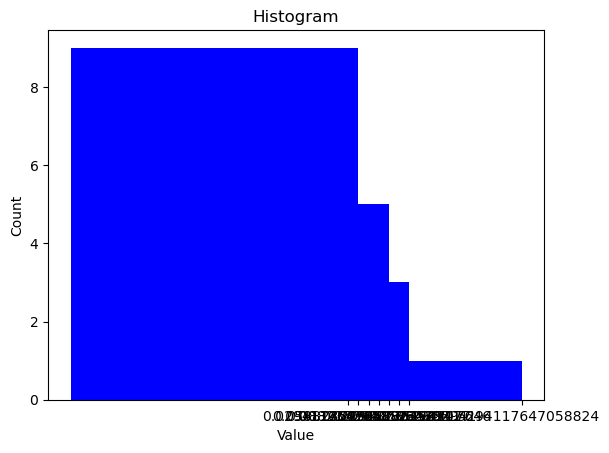


EIGENVECTOR CENTRALITY
The mean network eigenvector centrality is 0.13408046097132825, with stdev 0.10442912731778828
The maximum node is http://example.org/recursos#Persona, with value 0.5707115672003173
The minimum node is 1962, with value 0.03140973426510243
(0.5707115672003173, 0.26441163223915404, 0.2385149270528318, 0.21542177669422563, 0.2057420409696631, 0.20324335202996233, 0.19893898625192732, 0.19799034522207523, 0.19181864375961089, 0.1796849746019413, 0.17951377628944074, 0.16896028634989926, 0.1415913126362368, 0.13450062940803797, 0.13264325438956365, 0.11667505773564713, 0.09610668415744604, 0.08591948013247333, 0.05855050641881088, 0.05237898715976759, 0.05162579518707697, 0.05145982319061207, 0.04626439095751849, 0.041733380659701204, 0.03769262010826308, 0.03599908600505014, 0.03556186140065791, 0.03480866942796729, 0.03464269743150239, 0.03356265166788908, 0.03140973426510243) (1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

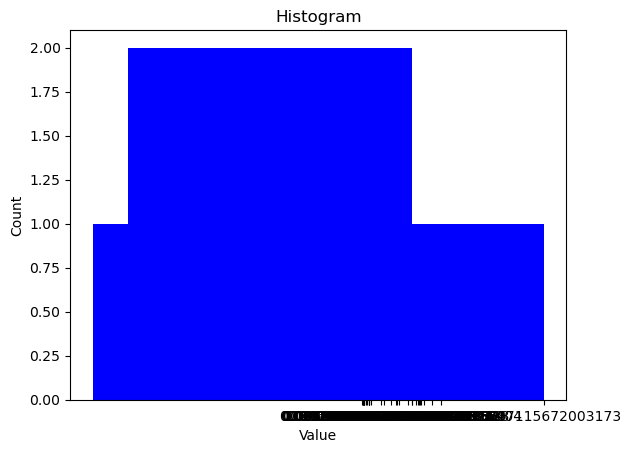


BETWEENNESS CENTRALITY
The mean betwenness centrality is 0.045683728036669216, with stdev 0.10284737156402128
The maximum node is http://example.org/recursos#Persona, with value 0.5906714200831849
The minimum node is 2015, with value 0.0
(0.5906714200831849, 0.1111111111111111, 0.09863339275103981, 0.09845513963161022, 0.09203802733214497, 0.08686868686868686, 0.08526440879382055, 0.07884729649435532, 0.0754604872251931, 0.06755793226381461, 0.038324420677361845, 0.02537136066547831, 0.011289364230540699, 0.0095068330362448, 0.0083184789067142, 0.0077243018419489015, 0.0077243018419489, 0.0017825311942959, 0.0) (1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 13)


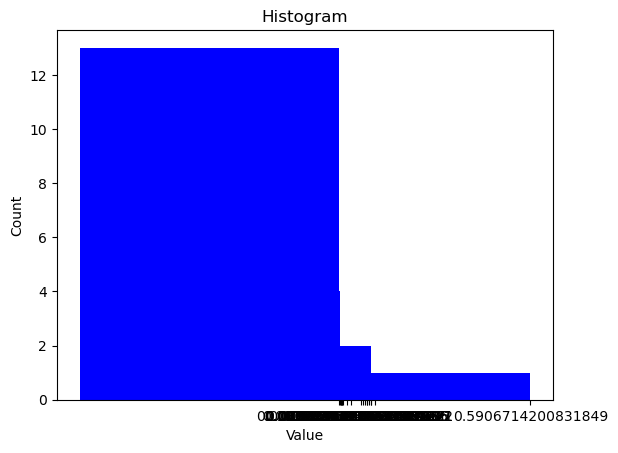


CONNECTED COMPONENTS
The graph has 1 connected components
Connected component 0 has 35 nodes

CLUSTERS
The graph has 35 clusters
Cluster 0 has 33 nodes
Cluster 1 has 36 nodes
Cluster 2 has 34 nodes
Cluster 3 has 42 nodes
Cluster 4 has 33 nodes
Cluster 5 has 4 nodes
Cluster 6 has 32 nodes
Cluster 7 has 33 nodes
Cluster 8 has 35 nodes
Cluster 9 has 34 nodes
Cluster 10 has 34 nodes
Cluster 11 has 33 nodes
Cluster 12 has 31 nodes
Cluster 13 has 33 nodes
Cluster 14 has 32 nodes
Cluster 15 has 37 nodes
Cluster 16 has 36 nodes
Cluster 17 has 33 nodes
Cluster 18 has 4 nodes
Cluster 19 has 34 nodes
Cluster 20 has 33 nodes
Cluster 21 has 32 nodes
Cluster 22 has 33 nodes
Cluster 23 has 33 nodes
Cluster 24 has 4 nodes
Cluster 25 has 34 nodes
Cluster 26 has 4 nodes
Cluster 27 has 35 nodes
Cluster 28 has 4 nodes
Cluster 29 has 34 nodes
Cluster 30 has 34 nodes
Cluster 31 has 4 nodes
Cluster 32 has 4 nodes
Cluster 33 has 4 nodes
Cluster 34 has 4 nodes

Visualizing the graph:


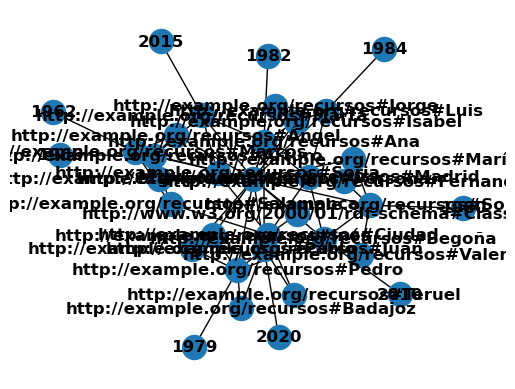

In [27]:
# Analysis

def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

def number_of_pendants(g):
    """
    Equals the number of nodes with degree 1
    """
    pendants = 0
    for u in g:
        if g.degree[u] == 1:
            pendants += 1
    return pendants


def histogram(l):
    degree_sequence = sorted([d for n, d in list(l.items())], reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    print(deg, cnt)
    
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title("Histogram")
    plt.ylabel("Count")
    plt.xlabel("Value")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

    plt.show()

# Network size
print("NETWORK SIZE")
print("============")
print("The network has {} nodes and {} edges".format(G.number_of_nodes(), G.number_of_edges()))
print()

# Network size
print("PENDANTS")
print("============")
print("The network has {} pendants".format(number_of_pendants(G)))
print()

# Density
print("DENSITY")
print("============")
print("The network density is {}".format(nx.density(G)))
print()

# Degree centrality -- mean and stdev
dc = nx.degree_centrality(G)
degrees = []
for k,v in dc.items():
    degrees.append(v)
    
print("DEGREE CENTRALITY")
print("=================")
print("The mean degree centrality is {}, with stdev {}".format(mean(degrees), statistics.stdev(degrees)))
print("The maximum node is {}, with value {}".format(max(dc, key=dc.get), max(dc.values())))
print("The minimum node is {}, with value {}".format(min(dc, key=dc.get), min(dc.values())))
histogram(dc)
print()

# Eigenvector centrality -- mean and stdev
ec = nx.eigenvector_centrality(G)
degrees = []
for k,v in ec.items():
    degrees.append(v)
    
print("EIGENVECTOR CENTRALITY")
print("======================")
print("The mean network eigenvector centrality is {}, with stdev {}".format(mean(degrees), statistics.stdev(degrees)))
print("The maximum node is {}, with value {}".format(max(ec, key=ec.get), max(ec.values())))
print("The minimum node is {}, with value {}".format(min(ec, key=ec.get), min(ec.values())))
histogram(ec)
print()

# Betweenness centrality -- mean and stdev
bc = nx.betweenness_centrality(G)
degrees = []
for k,v in bc.items():
    degrees.append(v)
print("BETWEENNESS CENTRALITY")
print("======================")
print("The mean betwenness centrality is {}, with stdev {}".format(mean(degrees), statistics.stdev(degrees)))
print("The maximum node is {}, with value {}".format(max(bc, key=bc.get), max(bc.values())))
print("The minimum node is {}, with value {}".format(min(bc, key=bc.get), min(bc.values())))
histogram(bc)
print()


# Connected components
cc = list(nx.connected_components(G))
print("CONNECTED COMPONENTS")
print("====================")
print("The graph has {} connected components".format(len(cc)))
for i,c in enumerate(cc):
    print("Connected component {} has {} nodes".format(i,len(c)))
print()

# Clusters
cl = nx.clustering(G)
print("CLUSTERS")
print("========")
print("The graph has {} clusters".format(len(cl)))
for i,c in enumerate(cl):
    print("Cluster {} has {} nodes".format(i,len(c)))
print()
    
# Plot
print("Visualizing the graph:")
plt.plot()
nx.draw(G, with_labels=True, font_weight='bold')